# **LAP 2 : DATA EXPLORATION & VISUALIZATIONS !!**

---





**Some of the questions we are trying to explore through EDA are:**

1. What are the distributions of loan data?
2. What are the correlation between the variables?
3. What are the characteristics of good and bad borrowers?
4. Which factors influence the loan repayment and default rate?


#  
## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [SUMMARY STATISTICS](#1)<br>
2. [DATA VISUALIZATION](#2)<br>
3. [UNIVARIATE ANALYSIS](#3)<br>
4. [BIVARIATE ANALYSIS](#4)<br>
5. [MULTIVARIATE ANALYSIS](#5)<br>
6. [ANALYSIS WITH PROBABILITY OF DEFAULT](#6)<br>

</div>
<hr>

###          IMPORT LIBRARIES & SET OPTIONS

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import squarify
import plotly
from datetime import datetime, date, time

plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('default')
pd.set_option('display.max_columns', 200)
pd.set_option('max_colwidth', 30)
pd.set_option('display.max_rows', 100)
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

###   LOAD DATA INTO PANDAS

In [ ]:
path = '/content/drive/MyDrive/LAP/'
df_loans = pd.read_csv(path + 'df_loans_clean.csv')

Although its a cleaned dataset, it has some 'missing values' and 'outliers'. Those can be observed in this EDA.

###  DATA INTEGRITY CHECKS

In [ ]:
df_loans.shape

(855969, 34)

In [ ]:
df_loans.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,bike,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,1
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,0


In [ ]:
df_loans.tail(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
855966,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,Jan-2015,debt_consolidation,Debt consolidation,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,34178.0,18000.0,0
855967,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,Jan-2015,debt_consolidation,Debt consolidation,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,Feb-2016,Jan-2016,1.0,22.0,0.0,0.0,58418.0,27000.0,0
855968,20000.0,36 months,11.99,664.20,B,10+ years,RENT,100000.0,Verified,Jan-2015,credit_card,Credit card refinancing,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,33307.0,41700.0,0


In [ ]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    855969 non-null  float64
 1   term                         855969 non-null  object 
 2   int_rate                     855969 non-null  float64
 3   installment                  855969 non-null  float64
 4   grade                        855969 non-null  object 
 5   emp_length                   812908 non-null  object 
 6   home_ownership               855969 non-null  object 
 7   annual_inc                   855969 non-null  float64
 8   verification_status          855969 non-null  object 
 9   issue_d                      855969 non-null  object 
 10  purpose                      855969 non-null  object 
 11  title                        855935 non-null  object 
 12  addr_state                   855969 non-null  object 
 13 

#   1. SUMMARY STATISTICS       <a id="1"></a>

In [ ]:
df_loans.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,855969.0,14745.57,8425.34,500.00,8000.00,13000.00,20000.00,35000.00
int_rate,855969.0,13.19,4.37,5.32,9.99,12.99,15.99,28.99
installment,855969.0,436.24,243.73,15.69,260.55,382.55,571.56,1445.46
annual_inc,855969.0,75071.19,64264.47,0.00,45000.00,65000.00,90000.00,9500000.00
dti,855969.0,18.12,17.42,0.00,11.88,17.61,23.90,9999.00
delinq_2yrs,855969.0,0.31,0.86,0.00,0.00,0.00,0.00,39.00
inq_last_6mths,855969.0,0.68,0.96,0.00,0.00,0.00,1.00,8.00
mths_since_last_delinq,416157.0,34.15,21.87,0.00,15.00,31.00,50.00,188.00
mths_since_last_record,131184.0,70.46,27.83,0.00,51.00,70.00,92.00,129.00
open_acc,855969.0,11.54,5.31,0.00,8.00,11.00,14.00,90.00


In [ ]:
df_loans.describe(include='object').round(2).T

,count,unique,top,freq
term,855969,2,36 months,600221
grade,855969,7,B,247998
emp_length,812908,11,10+ years,282090
home_ownership,855969,6,MORTGAGE,429106
verification_status,855969,3,Source Verified,318178
issue_d,855969,103,Oct-2015,48212
purpose,855969,14,debt_consolidation,505392
title,855935,60990,Debt consolidation,398089
addr_state,855969,51,CA,125172
earliest_cr_line,855969,697,Aug-2001,6433


###  SAMPLING FROM THE DATASET

In [ ]:
df_eda = df_loans.sample(frac=0.1)
df_eda.shape

(85597, 34)

In [ ]:
df_eda = df_eda.reset_index(drop=True); df_eda.shape

(85597, 34)

# 2. DATA VISUALIZATION                   <a id="2"></a>

###   UNDERSTANDING TARGET VARIABLE

In [ ]:
# Check level count of 'default_ind'
df_eda['default_ind'].value_counts()

,count
default_ind,
0,80954
1,4643


###  CHECKING FOR MISSING  VALUES

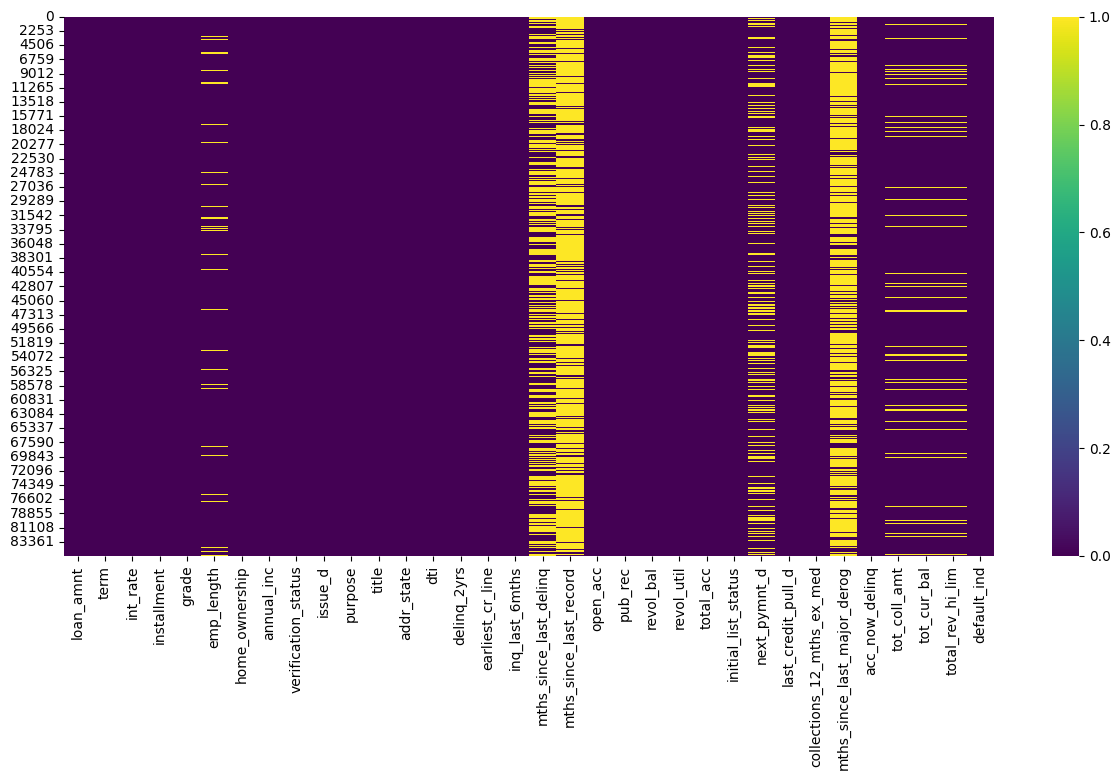

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df_eda.isnull(),cmap = 'viridis');

- All these Missing Values were all removed towards the end of PreProcessing section.

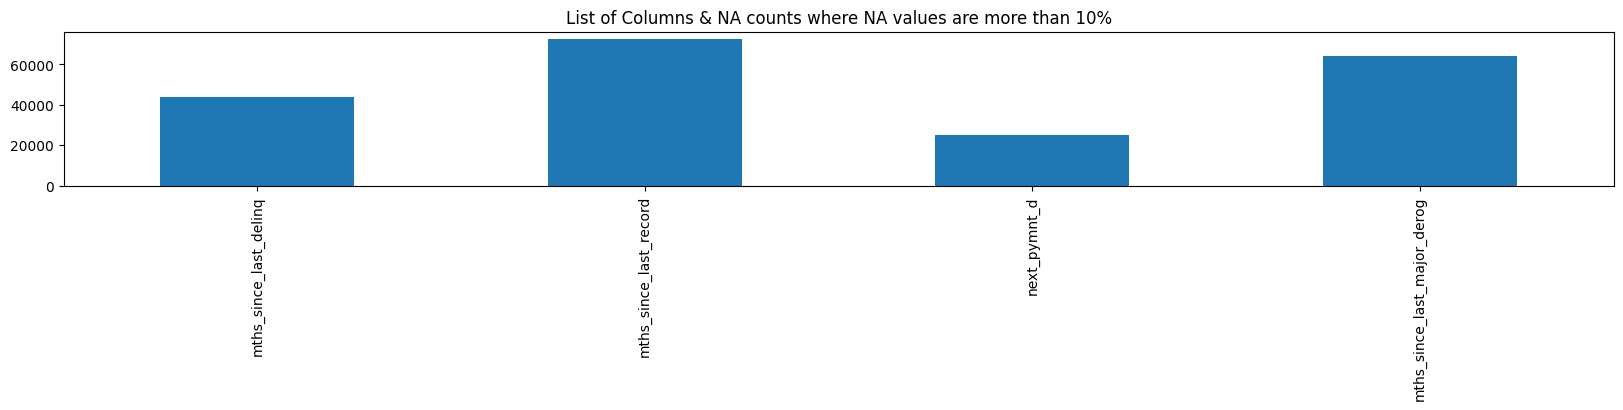

In [ ]:
NA_col = df_eda.isnull().sum()
NA_col = NA_col[NA_col.values >(0.1*len(df_eda))]
plt.figure(figsize=(20,2))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 10%')
plt.show()

- Here the plot shows four columns with 'Missing Values' greater than 10% of row count.

###   CHECKING FOR OUTLIERS

In [ ]:
len(df_eda.columns.values)

34

In [ ]:
df_eda.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,9975.0,36 months,15.61,348.78,D,2 years,MORTGAGE,40000.0,Source Verified,Jul-2015,debt_consolidation,Debt consolidation,FL,9.84,0.0,Jun-1988,1.0,29.0,NaN,11.0,0.0,4394.0,37.2,36.0,f,Feb-2016,Jan-2016,0.0,64.0,0.0,9519.0,143924.0,11800.0,0
1,10000.0,36 months,7.89,312.86,A,< 1 year,RENT,30000.0,Not Verified,Apr-2015,debt_consolidation,Debt consolidation,NY,16.56,0.0,Oct-2002,0.0,NaN,NaN,5.0,0.0,409.0,51.1,22.0,w,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,107589.0,800.0,0
2,14000.0,36 months,6.89,431.58,A,10+ years,RENT,38000.0,Source Verified,Sep-2015,credit_card,Credit card refinancing,VA,34.78,0.0,Oct-1999,0.0,52.0,NaN,14.0,0.0,13730.0,48.2,33.0,w,Feb-2016,Jan-2016,0.0,53.0,0.0,0.0,23648.0,28500.0,0
3,4000.0,36 months,11.99,132.84,B,5 years,MORTGAGE,46820.0,Verified,Apr-2014,home_improvement,Home improvement,GA,19.20,0.0,May-2002,0.0,38.0,96.0,10.0,1.0,4095.0,30.0,21.0,f,NaN,Aug-2015,0.0,NaN,0.0,0.0,33717.0,13700.0,0
4,28000.0,60 months,18.49,718.51,E,2 years,MORTGAGE,93000.0,Source Verified,Dec-2015,debt_consolidation,Debt consolidation,KY,17.15,0.0,Aug-1994,1.0,NaN,NaN,8.0,0.0,30052.0,75.3,26.0,w,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,305040.0,39900.0,0


In [ ]:
df_tmp = df_eda.describe().round(2).T; df_tmp

,count,mean,std,min,25%,50%,75%,max
loan_amnt,85597.0,14820.18,8454.50,1000.00,8000.00,13000.00,20000.00,35000.00
int_rate,85597.0,13.18,4.35,5.32,9.99,12.99,15.95,28.99
installment,85597.0,437.85,243.87,21.62,261.26,385.22,574.18,1409.99
annual_inc,85597.0,75185.82,51914.90,4800.00,45600.00,65000.00,90000.00,2500000.00
dti,85597.0,18.09,8.30,0.00,11.85,17.60,23.89,58.54
delinq_2yrs,85597.0,0.31,0.84,0.00,0.00,0.00,0.00,22.00
inq_last_6mths,85597.0,0.68,0.96,0.00,0.00,0.00,1.00,8.00
mths_since_last_delinq,41469.0,34.16,21.87,0.00,15.00,31.00,50.00,180.00
mths_since_last_record,13056.0,70.45,27.98,0.00,51.00,70.00,92.00,119.00
open_acc,85597.0,11.57,5.34,0.00,8.00,11.00,14.00,90.00


In [ ]:
df_eda.shape

(85597, 34)

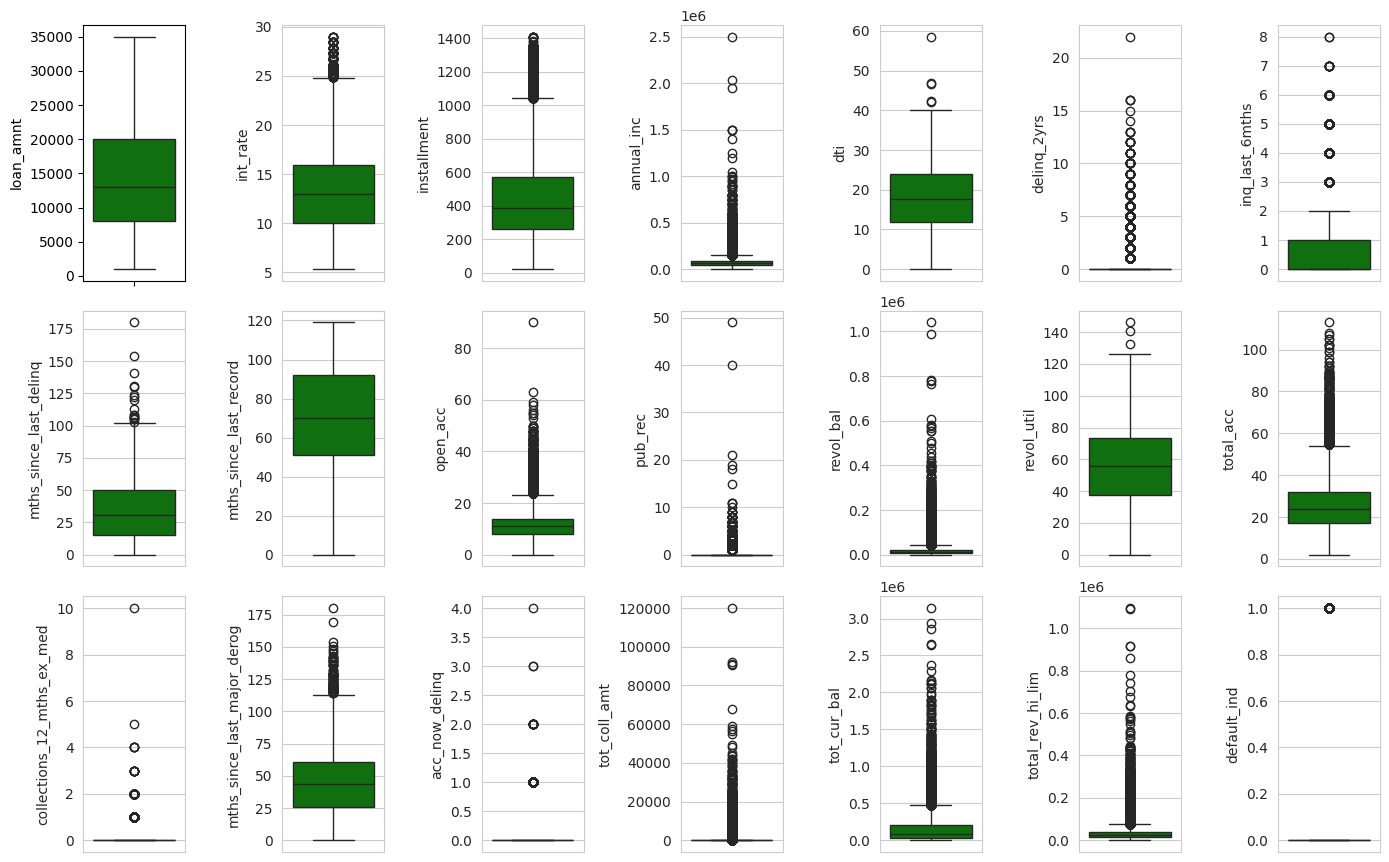

In [ ]:
l = df_tmp.index
number_of_columns=7
number_of_rows = 21
plt.figure(figsize=(2*number_of_columns,3*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_eda[l[i]],color='green',orient='v')
    plt.tight_layout()

Quiet a few outlier scenarios, which is dealt with later.

#  3. UNIVARIATE ANALYSIS                  <a id="3"></a>

####    DISTRIBUTION-SKEWNESS of Various Features

In [ ]:
l1 = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', \
      'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'acc_now_delinq', 'default_ind']

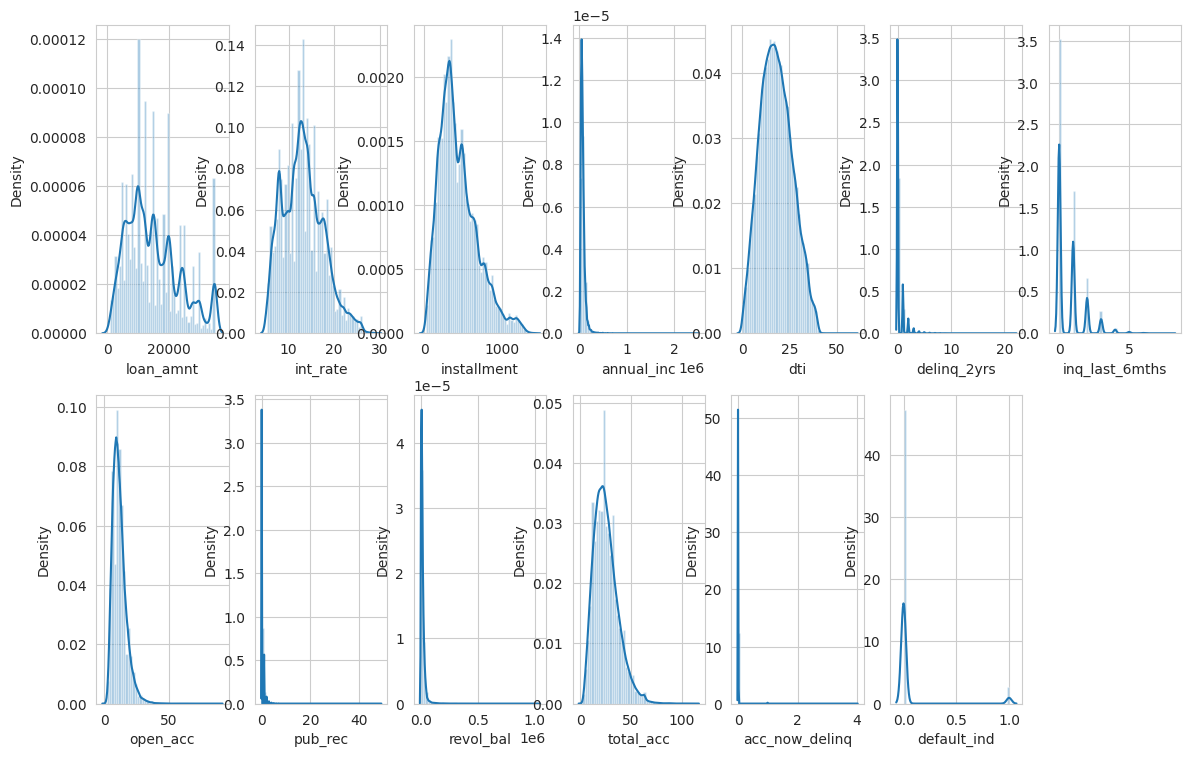

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l1)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_eda[l1[i]],kde=True)

- Loan Amount has a high peak at 10,000
- Interest Rate ranges from 5 to 25 pc

####   LOAN AMOUNT DISTRIBUTION

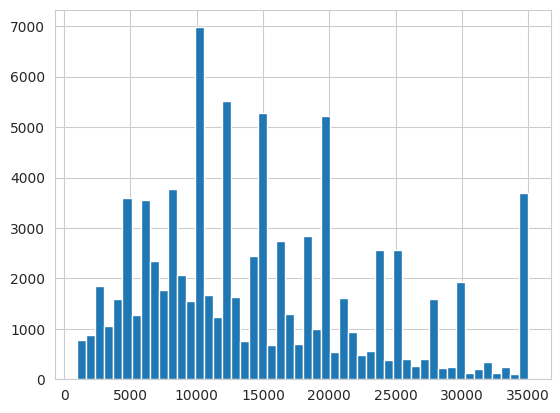

In [ ]:
df_eda['loan_amnt'].hist(bins=50);

- The high peaks (eg. 10000) indicates that most loaned amount are whole numbers like 5k, 10k, 15k, 20k, ......

####  INTEREST RATE DISTRIBUTION

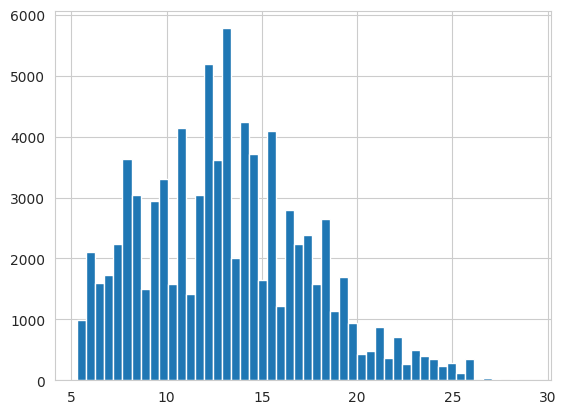

In [ ]:
df_eda['int_rate'].hist(bins=50);

- Most of the loans have a interest rate between 5 and 20 %, going upto ~27% in some cases.

#### EMPLOYEMENT LENGTH OF DISTRIBUTION

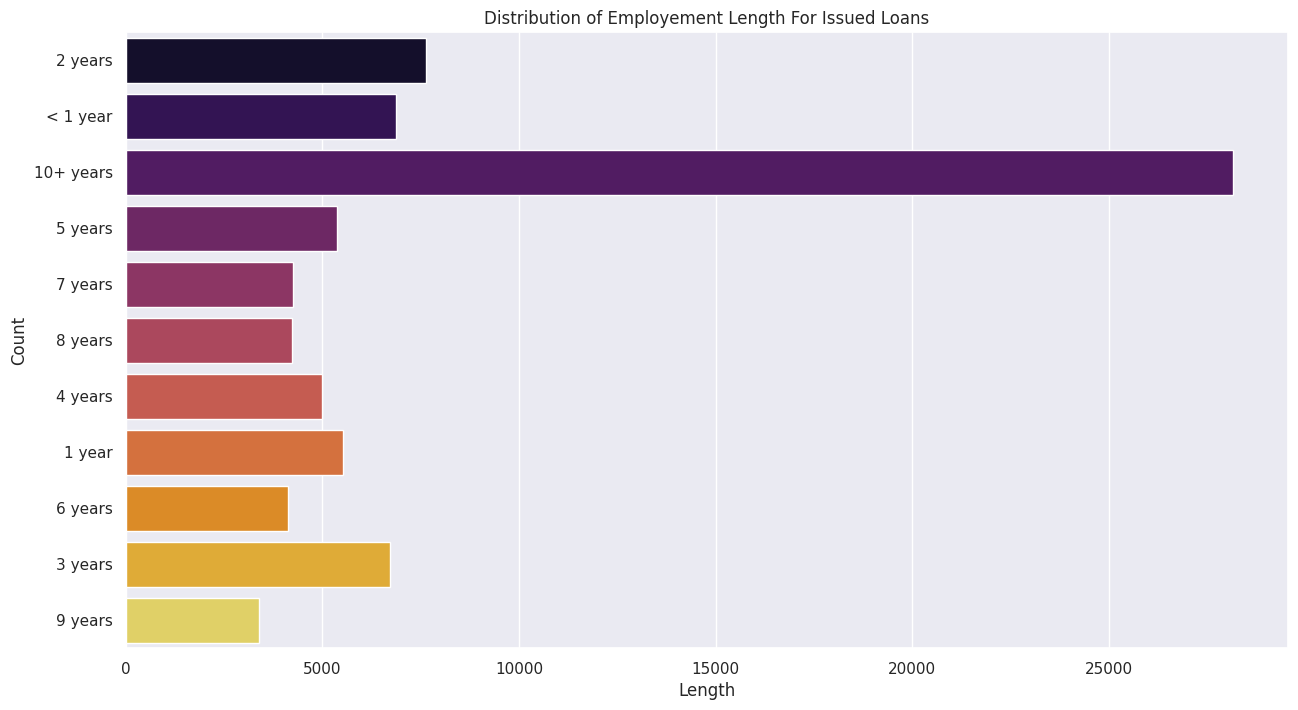

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df_eda['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans");

- Well, it can be seen that people who have worked for 10 take large loans

#### PURPOSE for loan

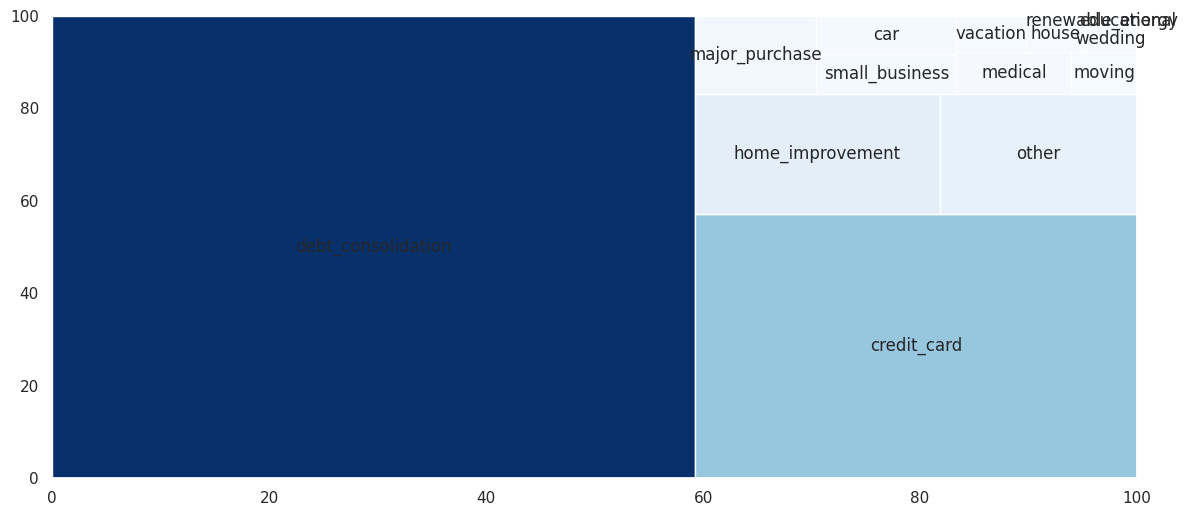

In [ ]:
count_p1 = df_eda['purpose'].value_counts()

# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(count_p1.values)
maxi=max(count_p1.values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in count_p1.values]

plt.figure(figsize=(14,6))
squarify.plot(sizes=count_p1.values, label=count_p1.index, color=colors);

- Credit-Consolidation @ 60% followed by 'credit card' and 'home improvement' tops the list.

####  HOME OWNERSHIP

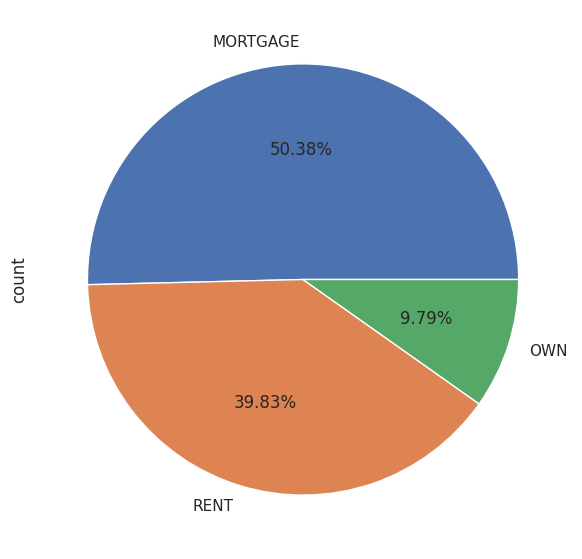

In [ ]:
plt.figure(figsize=(7,7))
df_eda['home_ownership'].value_counts()[0:3].plot(kind='pie',autopct='%1.2f%%');

- Less than 10% of Loan Burrowers own a house, while others either rent or mortgage with the latter being higher.

#  4. BIVARIATE ANALYSIS                    <a id="4"></a>

####    YEAR-WISE LOAN APPROVALS

In [ ]:
loans = pd.DataFrame()
loans['issue_month'],loans['issue_year'] = zip(*df_eda['issue_d'].str.split('-', n=1))
loans['default_ind'] = df_eda['default_ind']

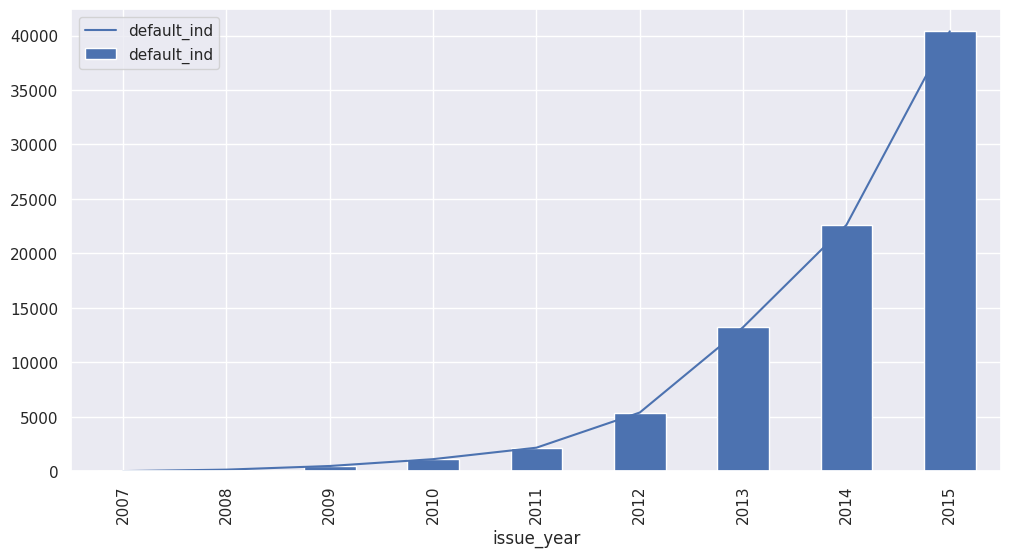

In [ ]:
year_wise =loans.groupby(by= [loans.issue_year])[['default_ind']].count()
ax =year_wise.plot(figsize=(12,6))
year_wise.plot(kind='bar',ax = ax)
plt.show()

- Loan Approvals are increasing y-o-y reaching 40k in year 2015

#### TERM vs LOAN STATUS

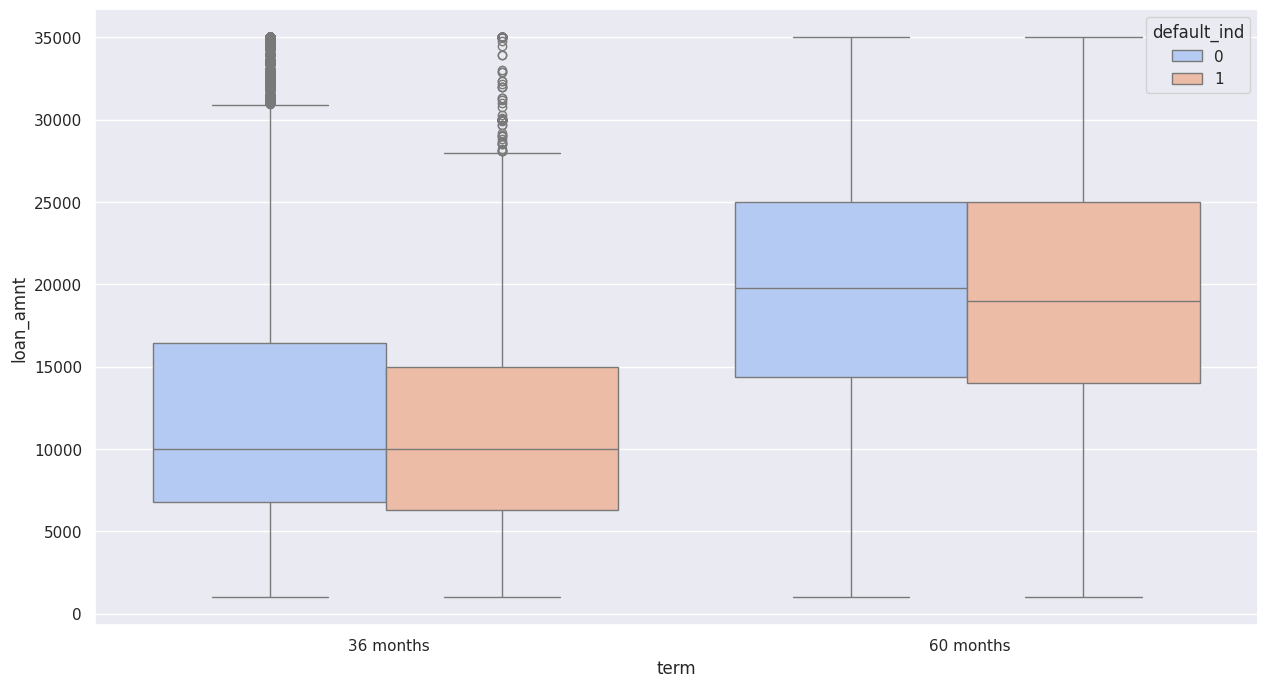

In [ ]:
sns.boxplot(x="term", y="loan_amnt", hue="default_ind",data=df_eda, palette="coolwarm");

- The 60m term has twice loan amounts compared to the 36m term loans.
- The 36m term loans have many outliers.

####   GRADE vs LOAN STATUS

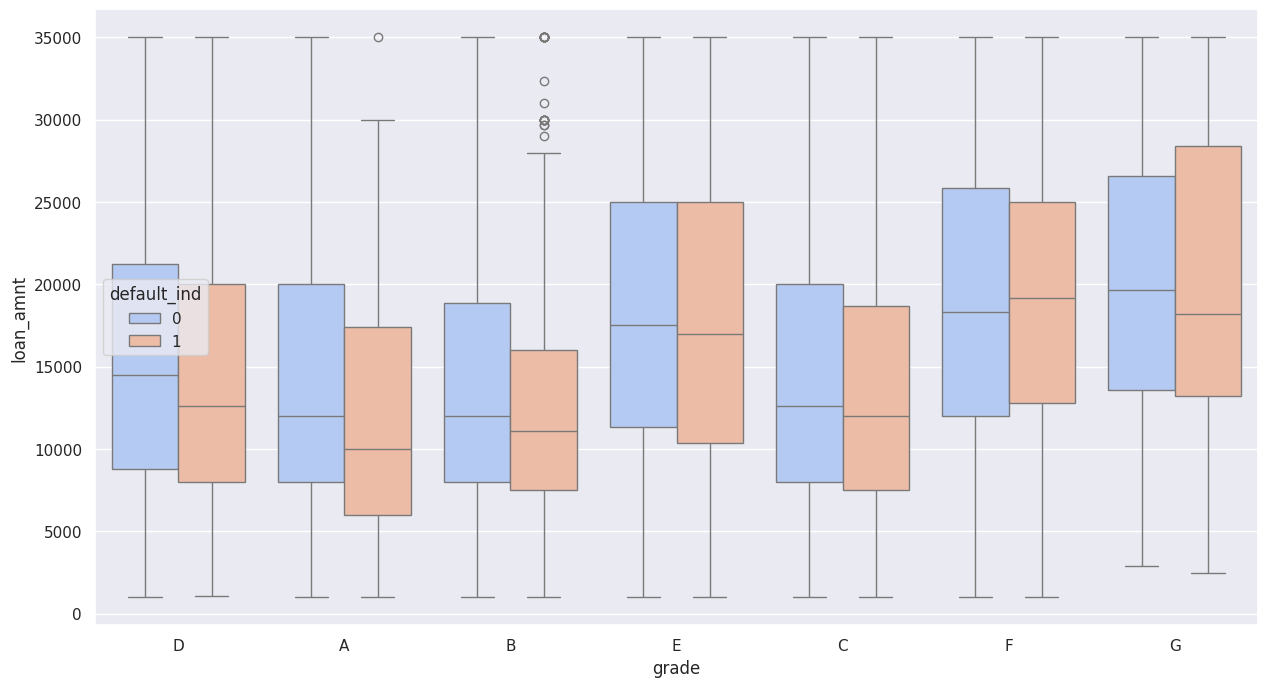

In [ ]:
sns.boxplot(x="grade", y="loan_amnt", hue="default_ind", data=df_eda, palette="coolwarm");

Grade A is issued less loan amount compared to grade G.

####    PURPOSE OF LOAN vs LOAN AMOUNT

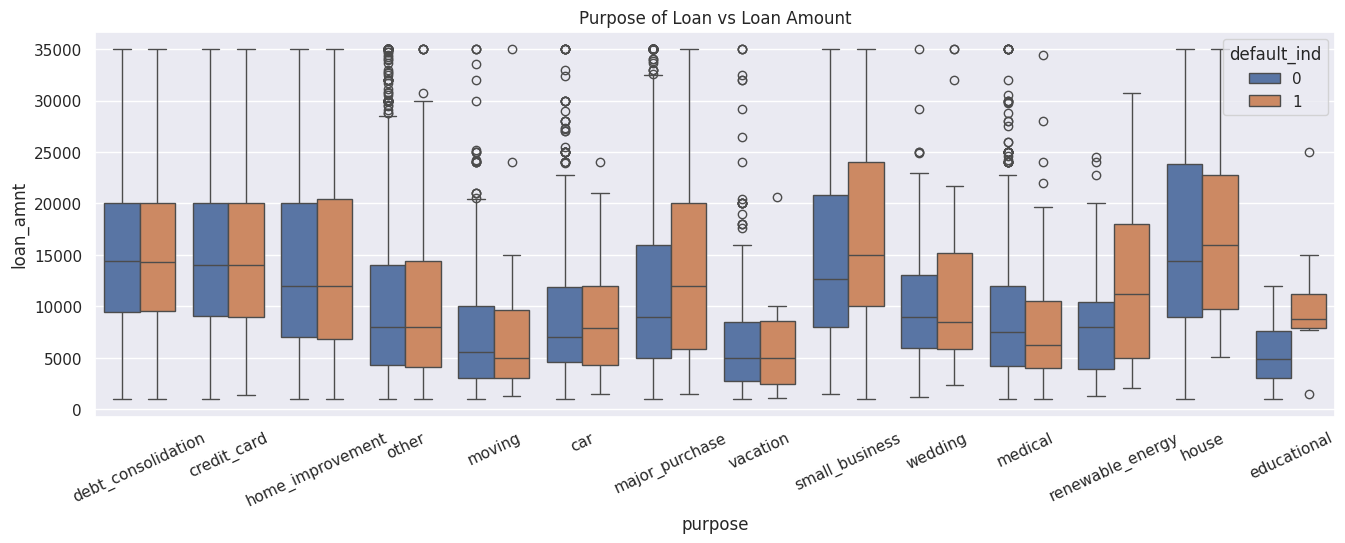

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(data =df_eda, x='purpose', y='loan_amnt', hue ='default_ind', orient= 'v')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=25)
plt.show()

Small Biz and house seems to be high at default.

####     PURPOSE OF LOAN vs LOAN AMOUNT

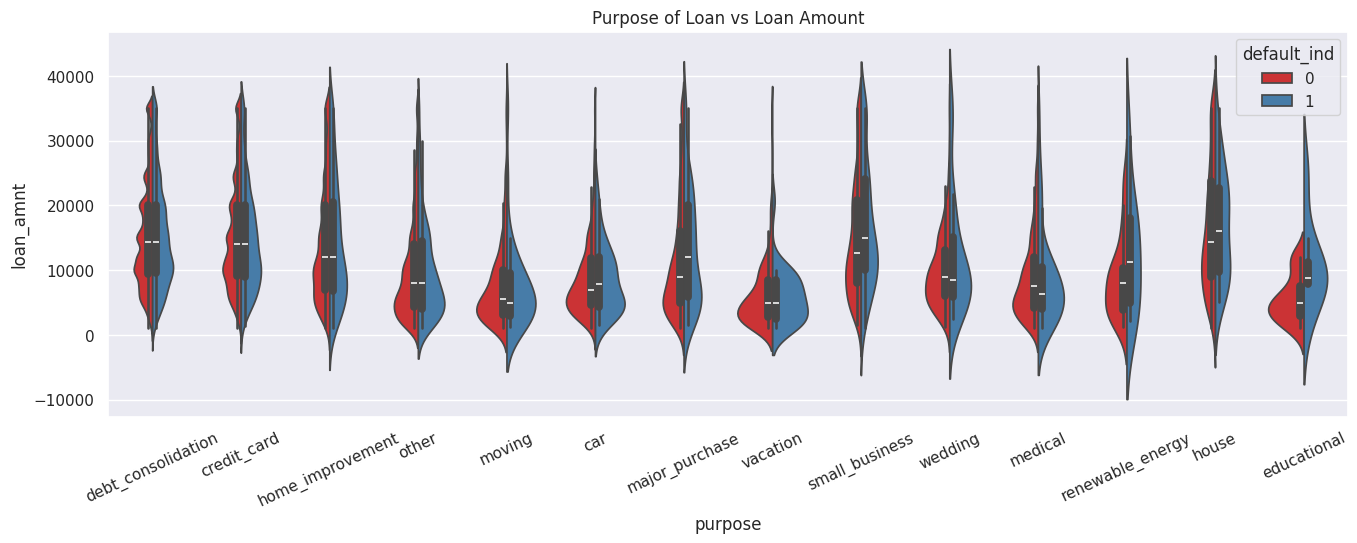

In [ ]:
plt.figure(figsize=(16,5))
sns.violinplot(x="purpose", y="loan_amnt", data=df_eda,hue='default_ind',split=True,palette='Set1')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=25)
plt.show()

The top purposes with the highest loan amount are credit card, small business, debt consolidation, home improvement and house.

#  5. MULTIVARIATE ANALYSIS                      <a id="5"></a>

####   CORRELATION MAP FOR NUMERIC FEATURES

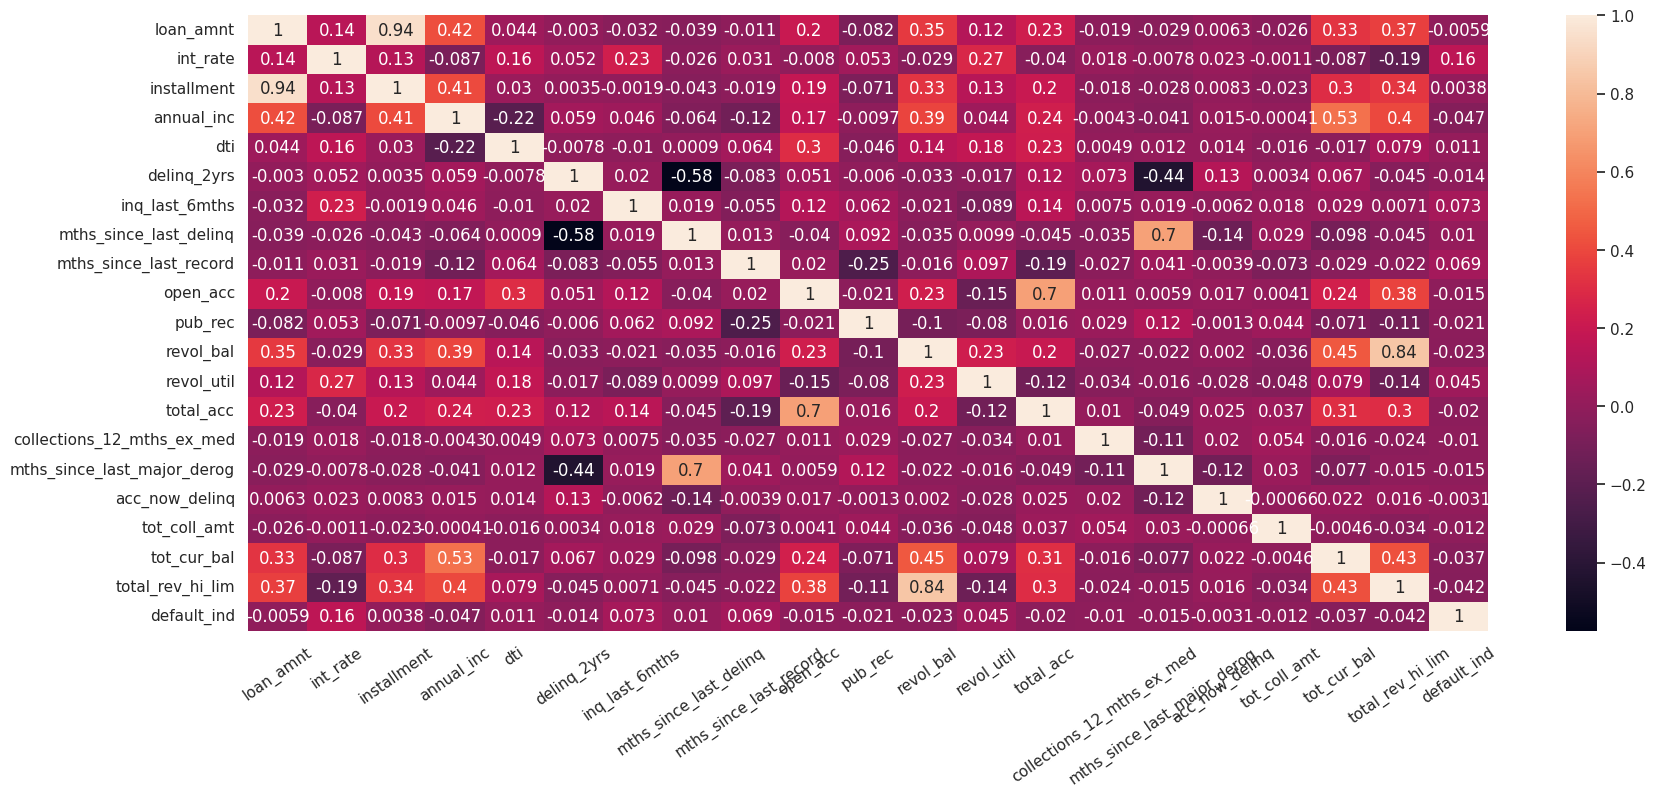

In [ ]:
plt.figure(figsize=(20,8))
numeric_df = df_eda.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)  #cmap='Blues' | "YlGnBu" | 'coolwarm'
plt.xticks(rotation=35);

####  FEATURES ARE RELATED TO THE TARGET VARIABLE

In [ ]:
# Get TOP 10 +- corred features_
corr['default_ind'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,default_ind,1.000000
1,int_rate,0.158547
2,inq_last_6mths,0.072741
3,mths_since_last_record,0.068762
4,revol_util,0.044842
5,dti,0.010877
6,mths_since_last_delinq,0.010424
7,installment,0.003751
8,acc_now_delinq,-0.003088
9,loan_amnt,-0.005878


####  CORRELATION AMONG SELECT FEATURES

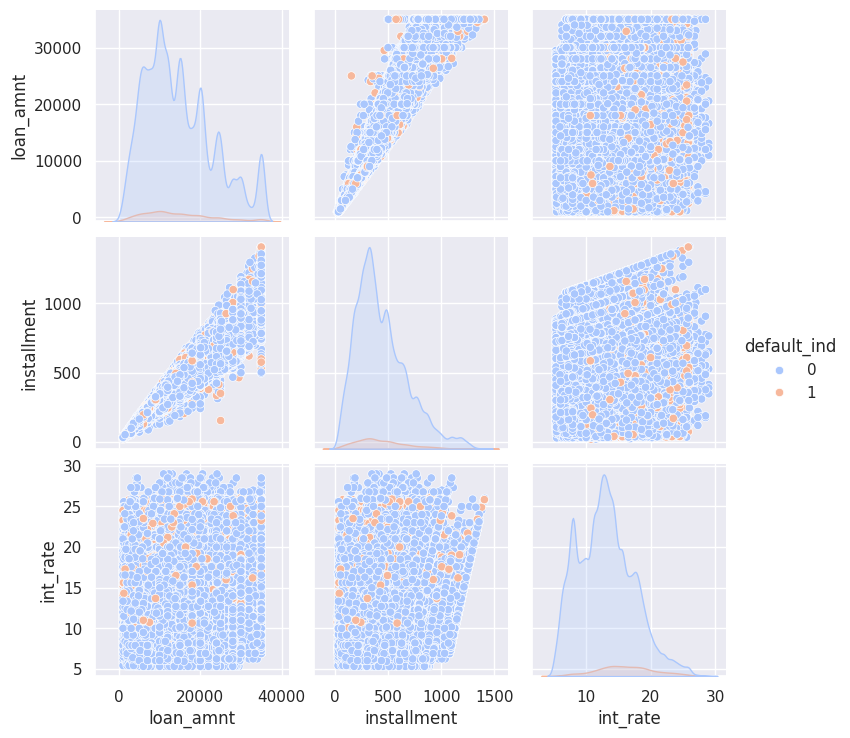

In [ ]:
crcol =['loan_amnt', 'installment', 'int_rate']

sns.pairplot(df_eda, x_vars=crcol, y_vars=crcol, hue='default_ind',palette='coolwarm');

Defaulters are spread across, and dont show any particular cluster pattern.

####  LOAN AMOUNT vs ANNUAL INCOME FOR VARIOUS PURPOSES

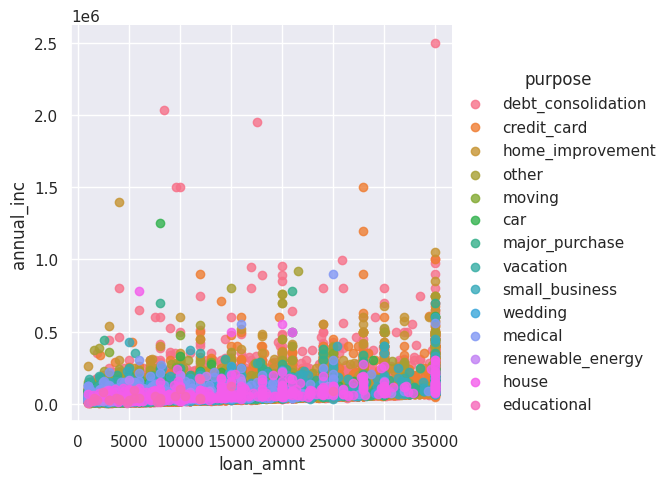

In [ ]:
sns.lmplot(x="loan_amnt", y="annual_inc", data=df_eda, fit_reg=False, hue='purpose', height=5, legend_out=True);

#  6. Analysis with Probability of Default                      <a id="6"></a>

####  Finding whats impacting the Loan Status the most.

\begin{equation*}
Probability(Default)   = \frac{Number  of  Applicants  Who  DEFAULTED}{Total  Number  of  Applicants}
\end{equation*}

**Calculating this Probability w.r.t  each column in  a bivariate analysis.**

In [ ]:
# Number of instances of Default can be seen abelow:
df_eda['default_ind'].value_counts()

,count
default_ind,
0,80954
1,4643


####  User Defined Function to call the plots

In [ ]:
def crosstaby(df,col):
    crosstaby = pd.crosstab(df_eda[col], df_eda['default_ind'],margins=True)
    crosstaby['Pr_default'] = round((crosstaby[1]/crosstaby['All']),3)
    crosstaby = crosstaby[0:-1]
    return crosstaby

In [ ]:
 # Probability of Default
def bivariate_prob(df,col,stacked= True):
    plotCrossy = crosstaby(df,col)

    linePlot = plotCrossy[['Pr_default']]
    barPlot =  plotCrossy.iloc[:,0:2]
    ax = linePlot.plot(figsize=(12,5), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=35,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability of Default',fontsize=16,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=12)
    ax.set_ylabel('Probability of Default',color = 'b',fontsize=12)
    ax2.set_ylabel('Number of Applicants',fontsize=12)
    plt.show()

 ###  PURPOSE OF LOAN vs PROBABILITY OF DEFAULT

In [ ]:
purpose = crosstaby(df_eda,'purpose')
display(purpose)

default_ind,0,1,All,Pr_default
purpose,,,,
car,854,54,908,0.059
credit_card,19047,846,19893,0.043
debt_consolidation,47956,2778,50734,0.055
educational,20,8,28,0.286
home_improvement,4801,229,5030,0.046
house,329,33,362,0.091
major_purchase,1522,91,1613,0.056
medical,777,41,818,0.050
moving,438,32,470,0.068


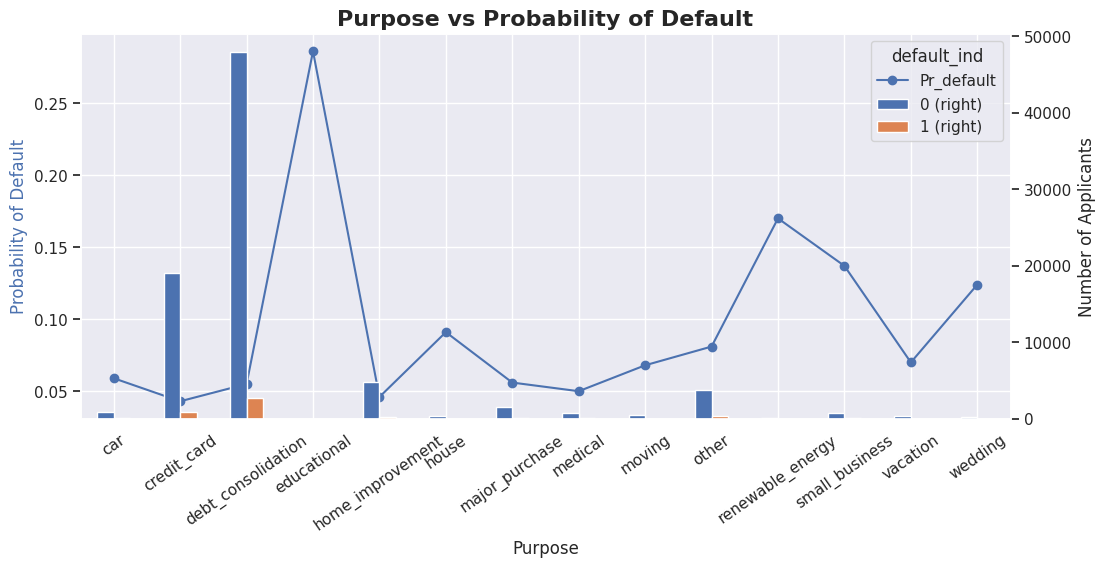

In [ ]:
bivariate_prob(df =df_eda,col ='purpose',stacked=False)

Education and Renewable Energy has high Probability of default.

 ###  GRADE vs PROBABILITY OF DEFAULT

In [ ]:
grade = crosstaby(df_eda,'grade')
display(grade)

default_ind,0,1,All,Pr_default
grade,,,,
A,14317,269,14586,0.018
B,23843,939,24782,0.038
C,22440,1287,23727,0.054
D,12253,1102,13355,0.083
E,5927,662,6589,0.100
F,1794,307,2101,0.146
G,380,77,457,0.168


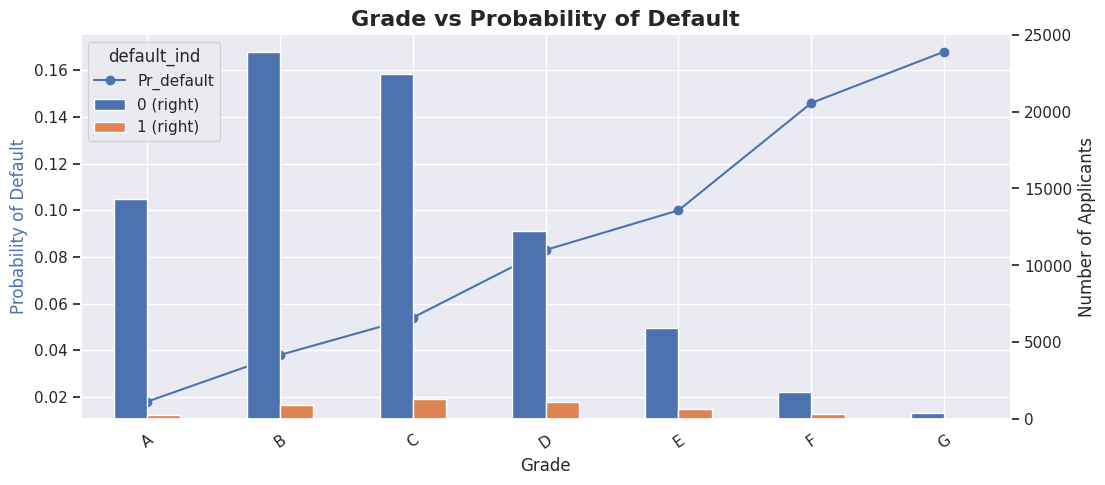

In [ ]:
bivariate_prob(df =df_eda,col ='grade',stacked=False)

As grade goes from A to G, the Probability of default goes up.

 ###   EMPLOYMENT LENGTH vs PROBABILITY OF DEFAULT

In [ ]:
emp_length = crosstaby(df_eda,'emp_length')
display(emp_length)

default_ind,0,1,All,Pr_default
emp_length,,,,
1 year,5185,327,5512,0.059
10+ years,26811,1344,28155,0.048
2 years,7225,404,7629,0.053
3 years,6353,374,6727,0.056
4 years,4688,306,4994,0.061
5 years,5080,295,5375,0.055
6 years,3814,309,4123,0.075
7 years,3972,268,4240,0.063
8 years,4038,196,4234,0.046


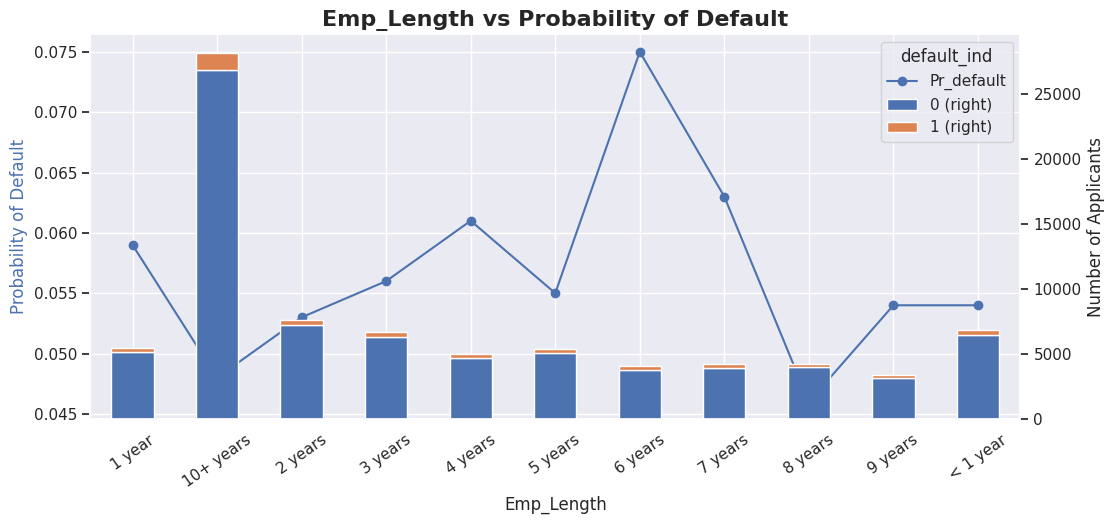

In [ ]:
bivariate_prob(df =df_eda,col ='emp_length')

Employees with 6 yrs followed by 4 yrs and new comers have greater Probability of default.

 ###   LOCATION vs PROBABILITY OF DEFAULT

In [ ]:
states = df_eda.addr_state.value_counts()
states = states[(states < 10)]

loan_states = df_eda.drop(labels = df_eda[df_eda.addr_state.isin(states.index)].index)

In [ ]:
Dstates = crosstaby(loan_states,'addr_state')
# display(Dstates)
print(Dstates.sort_values(by='Pr_default',ascending=False).head(10))

default_ind      0    1    All  Pr_default
addr_state                                
NV            1085   82   1167       0.070
NM             422   31    453       0.068
FL            5439  394   5833       0.068
MI            2157  145   2302       0.063
OK             744   48    792       0.061
LA             921   60    981       0.061
AL             977   62   1039       0.060
NJ            3026  186   3212       0.058
CA           11704  721  12425       0.058
NY            6725  413   7138       0.058


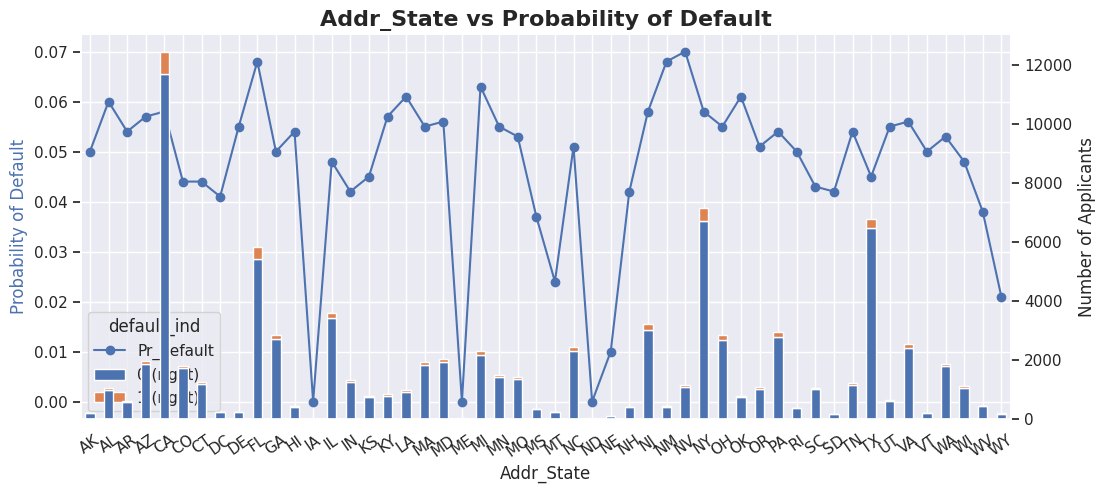

In [ ]:
bivariate_prob(df =loan_states,col ='addr_state')

Probability of default seems to be consistent across states, except for IA, ME, ND, MT and WY where its pretty low.